# Loss Surface Visualization

Understanding the geometry of the loss function before optimization.

## Objective

Visualize the Mean Squared Error loss surface for linear regression
to build geometric intuition before applying any optimization algorithm.

## Scope

This notebook focuses on:
• Loss surface geometry
• Convexity and curvature
• Parameter–error relationship

## Out of scope

This notebook explicitly excludes:
• Gradient Descent
• Learning rates
• Training loops
• Model evaluation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

## Data-generating process

A simple linear relationship with additive noise is used to ensure:
• Interpretability
• Convex loss surface
• Visual tractability

In [2]:
X = np.linspace(0, 10, 50)
y = 3.0 * X + 5.0 + np.random.normal(0, 2, size=len(X))

## Loss definition

Mean Squared Error is used as the loss function.
The loss is evaluated over parameter space, not optimized.

In [3]:
def mse_loss(w, b, X, y):
    y_pred = w * X + b
    return np.mean((y - y_pred) ** 2)

## Parameter grid

The loss is evaluated across a grid of weight and bias values
to explicitly observe the loss surface.

In [4]:
w_range = np.linspace(0, 6, 100)
b_range = np.linspace(0, 10, 100)

W, B = np.meshgrid(w_range, b_range)
Loss = np.zeros_like(W)

for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        Loss[i, j] = mse_loss(W[i, j], B[i, j], X, y)

## Loss surface

The 3D surface represents how error changes as parameters vary.

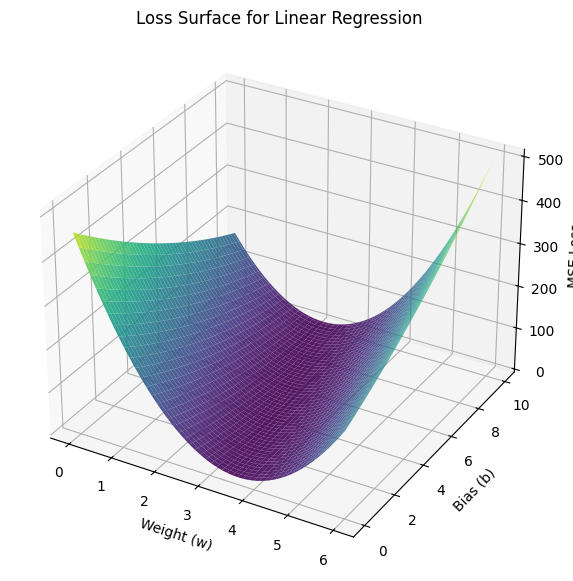

In [5]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(projection="3d")

ax.plot_surface(W, B, Loss, cmap="viridis", alpha=0.9)
ax.set_xlabel("Weight (w)")
ax.set_ylabel("Bias (b)")
ax.set_zlabel("MSE Loss")

plt.title("Loss Surface for Linear Regression")
plt.show()

## Loss contours

Contours provide a 2D projection of the loss surface and will be
used to reason about optimization trajectories in the next notebook.

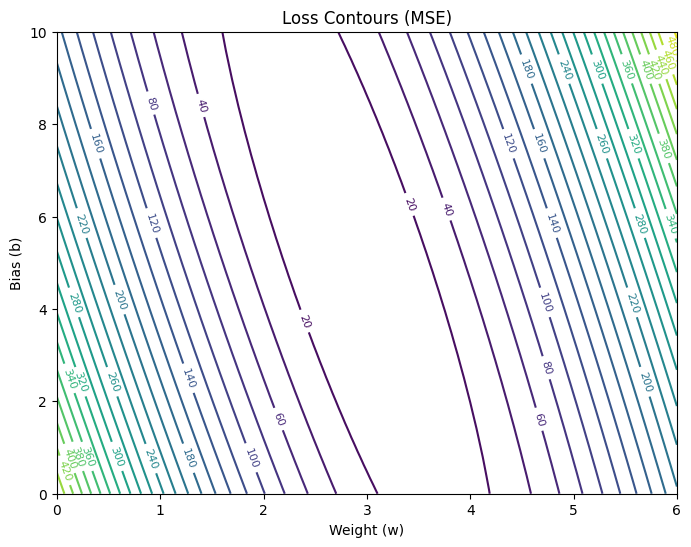

In [6]:
plt.figure(figsize=(8, 6))
contours = plt.contour(W, B, Loss, levels=30)
plt.clabel(contours, inline=True, fontsize=8)
plt.xlabel("Weight (w)")
plt.ylabel("Bias (b)")
plt.title("Loss Contours (MSE)")
plt.show()

## Interpretation

The loss surface is smooth, convex, and contains a single global minimum.

Optimization algorithms do not search globally.
They move locally over this surface following update dynamics.

Any instability observed later must be explained by the interaction
between those dynamics and this geometry.

## Takeaway

Before tuning optimizers or learning rates, the geometry of the loss
function must be understood.

Most optimization failures are geometric, not algorithmic.